<a href="https://colab.research.google.com/github/Laura-VFA/MachineLearning-21-22/blob/main/ML_Deliverable3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Laura Villa Fernández-Arroyo
- Sergio Martínez Cid
- David González Bermúdez

## ML2021 - Assesment Work (Regression)

The challenge is to predict Workers Compensation claims using realistic data.

**Model Evaluation**: MSE, $R^2$, ...

## Data Loading 




0. Imports

In [1]:
# Imports
import pydot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import starmap
from datetime import datetime
from tqdm import tqdm
from IPython.display import Image
from io import StringIO

from sklearn import linear_model, metrics, neighbors, tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

import nltk
nltk.download("punkt") 
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1. Download the train data

In [2]:
!wget https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv

--2022-01-20 12:48:19--  https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv [following]
--2022-01-20 12:48:20--  https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4942050 (4.7M) [text/plain]
Saving to: ‘train.csv.3’

train.csv.3         100%[===================>]   4.71M  --.-KB/s    in 0.09s   

2022-01-20 12:48:21 (53.0 MB/s) - ‘train.csv.3’ saved [4942050/4942050]



In [3]:
df = pd.read_csv("train.csv")
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


The training set containing 30,000 insurance policies that you can use to train your model.

**Data fields**

-  ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost
- **UltimateIncurredClaimCost**: Total claims payments by the insurance company. This is the field you are asked to predict in the test set.

In [4]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

In [5]:
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


## Preprocessing

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, ...



### Missing Values

It is necessary to address the missing values to improve the quality of the data that will be used to generate the models. 

In [6]:
df.shape

(36176, 15)

In [7]:
pd.isnull(df).any()

ClaimNumber                  False
DateTimeOfAccident           False
DateReported                 False
Age                          False
Gender                       False
MaritalStatus                 True
DependentChildren            False
DependentsOther              False
WeeklyWages                   True
PartTimeFullTime             False
HoursWorkedPerWeek            True
DaysWorkedPerWeek            False
ClaimDescription             False
InitialIncurredCalimsCost    False
UltimateIncurredClaimCost    False
dtype: bool

In [8]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [9]:
df.shape

(36049, 15)

### OneHotEncoding 

[OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [10]:
df_OneHot = pd.get_dummies(df[['Gender','MaritalStatus', 'PartTimeFullTime']])
df_OneHot

,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
36171,1,0,0,0,1,0,1,0
36172,0,1,0,1,0,0,1,0
36173,1,0,0,1,0,0,0,1
36174,0,1,0,1,0,0,1,0


> At the begining only the numerical and the encoded features must be considered.

> At the end of the work you can include text, date information and so on.

In [11]:
df_full = pd.concat([df, df_OneHot], axis = 1)
df_full.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,1,0,1,0,0,1,0
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,0,1,0,0,1,0
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,1,0,0,0,1,1,0
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,1,0,0,1,0,1,0
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,0,1,0,1,0,0,1,0


### Train and test split

In [12]:
x_features = ['WeeklyWages', 'HoursWorkedPerWeek', 'InitialIncurredCalimsCost']


In [13]:
X = df[x_features]
y = df['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


## Basic Modeling 

We’ll be exploring Linear Regression using scikit-learn in python.

We will use the selected features to predict the results. 

Linear regression produces a model in the form:


 $$
 Y_{t}=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\cdots +\beta _{p}X_{p}+\varepsilon
 $$

The way this is accomplished is by minimising the residual sum of squares, given by the equation below:
$$
RSS=Σni=1(yi–y^i)2
$$

$$
RSS=Σni=1(yi–β0^–β1^x1–β2^x2–…–βp^xp)
$$


Scikit-learn provides a LinearRegression function for doing this job.
Linear Regression (Dummy Model)

In [14]:

model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, which is an array of tuples of coefficients.

In [15]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for WeeklyWages is 9.794779343746388
The coefficient for HoursWorkedPerWeek is -25.675661234818307
The coefficient for InitialIncurredCalimsCost is 0.7743349854415342


Note that, because we’ve not done any feature scaling or dimensionality reduction, we can’t say anything about the relative importance of each of our features given these coefficients because the features are not of the same scale.

In [16]:
y_pred = model.predict(X_test)

In [17]:

print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))


MAE: 7979.755264779615
MAPE: 0.8024366465210745
MSE: 547594288.9830517
R^2: -1.5990659116870134


# 1. BaseLine (kNN or DecisionTrees)

- Feature Selection
- CrossValidation 
   - kNN: k, weights, metric (manhattan, euclidean)
   - Decisiontrees: max_depth


In [18]:
# Feature Selection
# Remove superfluous features (gender ot others due to onehot encoding)
df_not_categ = df_full.drop(labels=['Gender', 'MaritalStatus', 'PartTimeFullTime'], axis=1)

# Remove not numeric features (dates and descriptions)
df_numeric = df_not_categ.drop(labels=['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'ClaimDescription'], axis=1)

df_numeric.head()


,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,48,0,0,500.00,38.0,5,1500,4748.203388,0,1,0,1,0,0,1,0
1,43,0,0,509.34,37.5,5,5500,6326.285819,1,0,0,1,0,0,1,0
2,30,0,0,709.10,38.0,5,1700,2293.949087,0,1,0,0,0,1,1,0
3,41,0,0,555.46,38.0,5,15000,17786.487170,0,1,0,0,1,0,1,0
4,36,0,0,377.10,38.0,5,2800,4014.002925,0,1,0,1,0,0,1,0


## 1.1 DecisionTrees

### 1.1.1 All features

In [19]:
# Train and test set definition
x_features = list(df_numeric.columns)
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0
1,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0
2,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0
3,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0
4,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0


In order to increase the capacity of the model to deal with new data, cross-validation is applied. Furthermore, a simple hyperparameter optimization is applied, where values from 1 to 30 are assigned to the max_depth hyperparameter.

No handles with labels found to put in legend.


Min Value : 7927.09426834388 (3)


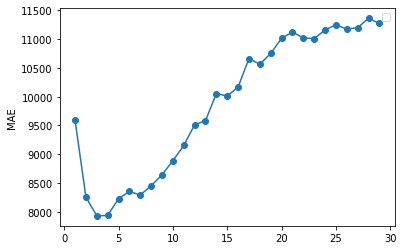

In [20]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # Fit and predict
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)

          # Evaluation of the model
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

The best observed value for max_depth is 3.

In [21]:
depth = 3
regr = tree.DecisionTreeRegressor(max_depth = depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=3, random_state=0)

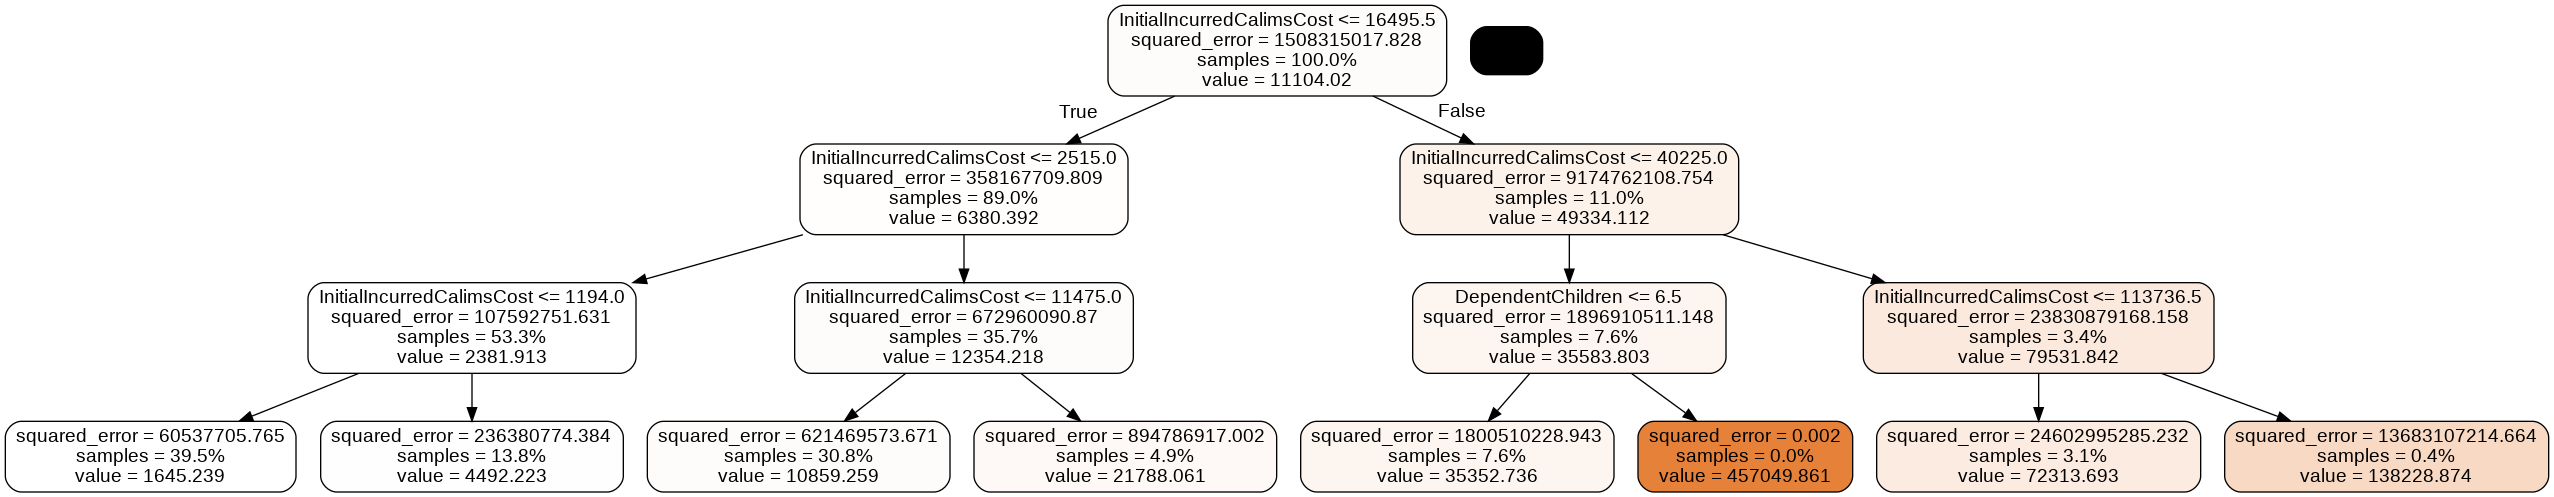

In [22]:
# Draw the tree
dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=x_features, 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [23]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.00000
1,DependentChildren,0.02673
2,DependentsOther,0.00000
3,WeeklyWages,0.00000
4,HoursWorkedPerWeek,0.00000
5,DaysWorkedPerWeek,0.00000
6,InitialIncurredCalimsCost,0.97327
7,Gender_F,0.00000
8,Gender_M,0.00000
9,Gender_U,0.00000


In [24]:
y_pred = regr.predict(X_test)

In [25]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 7461.997334426615
MAPE: 1.4046078782664182
MSE: 499742094.625019
R^2: 0.30947900245358895


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


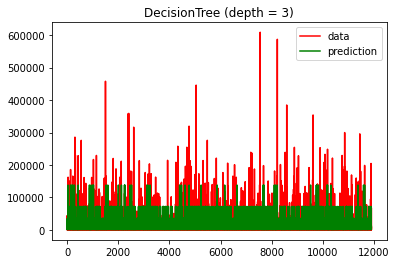

In [26]:
# Graph of prediction
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree (depth = %i)" % (depth))

plt.show()

### 1.1.2 Predict *Initial cost* instead of *Final* one

As InitialIncurredCalimsCost influence is very high, it could be distorting/decreasing the other variables influence. For that reason, the InitialIncurredCalimsCost will be predicted. Obviously, the UltimateIncurredClaimCost will be discarded.

In [27]:
# Train and test set definition
x_features = list(df_numeric.columns)
x_features.remove('InitialIncurredCalimsCost')
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['InitialIncurredCalimsCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,37,0,0,634.00,38.0,5,0,1,0,0,1,0,1,0
1,26,0,0,422.70,24.2,5,0,1,0,0,1,0,1,0
2,52,0,0,761.97,38.0,5,0,1,0,1,0,0,1,0
3,33,0,0,200.00,38.0,5,1,0,0,1,0,0,1,0
4,42,0,0,865.38,38.0,5,0,1,0,1,0,0,1,0


No handles with labels found to put in legend.


Min Value : 7972.310713042233 (5)


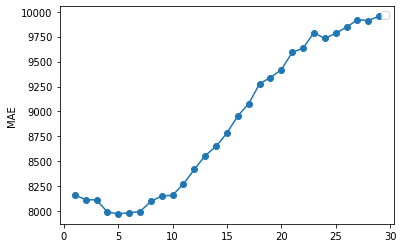

In [28]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # Fit and predict
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)

          # Evaluation of the model
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

The best observed value for max_depth is 5.

In [29]:
depth = 5
regr = tree.DecisionTreeRegressor(max_depth =depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=5, random_state=0)

In [30]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.036615
1,DependentChildren,0.310212
2,DependentsOther,0.003514
3,WeeklyWages,0.405872
4,HoursWorkedPerWeek,0.032752
5,DaysWorkedPerWeek,0.097177
6,Gender_F,0.000000
7,Gender_M,0.000000
8,Gender_U,0.000000
9,MaritalStatus_M,0.000000


In [31]:
y_pred = regr.predict(X_test)

In [32]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 7883.082335753751
MAPE: 15.27014395963429
MSE: 361874919.70842
R^2: -0.13495659088704892


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


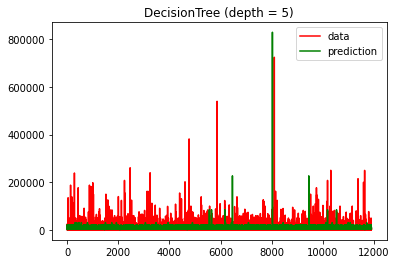

In [33]:
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree (depth = %i)" % (depth))

plt.show()

### 1.1.3 Taking top 4 variables - predicting *Initial cost*

There are 4 features with a high relevance in the previous model. Our next test is the same as the previous one, but using only the top 4 features according to their relevance.

In [34]:
# Train and test set definition
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek']

X = df_numeric[x_features]
y = df_numeric['InitialIncurredCalimsCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek
0,1,0,634.00,5
1,1,0,422.70,5
2,0,0,761.97,5
3,0,0,200.00,5
4,0,0,865.38,5


No handles with labels found to put in legend.


Min Value : 8048.401166075523 (4)


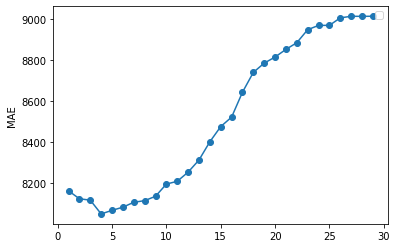

In [35]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # Fit and predict 
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)

          # Evaluation of the model
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

The best observed value for max_depth is 4.

In [36]:
depth = 4
regr = tree.DecisionTreeRegressor(max_depth = depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=4, random_state=0)

In [37]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,MaritalStatus_S,0.043813
1,DependentChildren,0.349917
2,WeeklyWages,0.430062
3,DaysWorkedPerWeek,0.176208


In [38]:
y_pred = regr.predict(X_test)

In [39]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 7986.3193192541485
MAPE: 14.470578033666913
MSE: 356944410.70831525
R^2: -0.11949292269306167


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


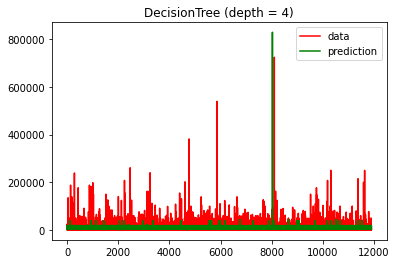

In [40]:
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTree (depth = %i)" % (depth))

plt.show()

### 1.1.4 Taking top 4 + *Initial cost* - predicting *Final cost*

The previous tests were oriented towards reducing the error by selecting the most relevant features. In this test, the top 4 features are used along with the initial cost (as it is still the most relevant feature by a wide margin). However, this newfound information is used for predicting the ultimate cost.

In [41]:
# Train and test set definition
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
0,1,0,634.00,5,10000
1,1,0,422.70,5,3000
2,0,0,761.97,5,50000
3,0,0,200.00,5,650
4,0,0,865.38,5,3250


No handles with labels found to put in legend.


Min Value : 7914.081370797554 (6)


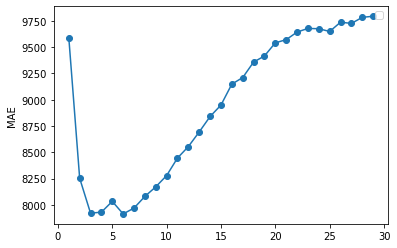

In [42]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # Fit and predict
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)

          # Evaluation
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [43]:
depth = 6
regr = tree.DecisionTreeRegressor(max_depth = depth, random_state=0)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=6, random_state=0)

In [44]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,MaritalStatus_S,0.00000
1,DependentChildren,0.02291
2,WeeklyWages,0.21042
3,DaysWorkedPerWeek,0.00138
4,InitialIncurredCalimsCost,0.76529


In [45]:
y_pred = regr.predict(X_test)

In [46]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 7430.652164513954
MAPE: 1.262659450720814
MSE: 588133713.2792689
R^2: 0.1873434662553165


## 1.2 kNN


### 1.2.1 All features

In [47]:
# Train and test definition
x_features = list(df_numeric.columns)
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0
1,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0
2,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0
3,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0
4,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0


In [48]:
# Reset index to avoid problems in cross validation
#X_train.reset_index(drop = True, inplace = True)
#X_train.head()

Two ways of calculating the weight of neighbours have been tested: uniform and distance. The first method gives the same weight to all neighbours while the second gives more or less weight depending on the distance from the neighbour to the new point.
Within each of these methods, the influence of the number of neighbours on the model error has been analysed.
In each of the tests, cross-validation has been carried out on the basis of a training set.

Min Value uniform : 7817.362429688228 (20)
Min Value distance : 7968.080735108606 (20)


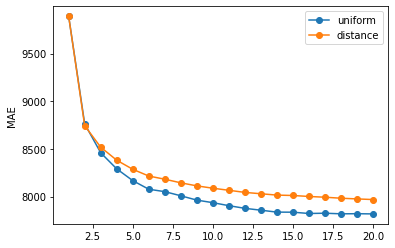

In [49]:

cv = KFold(n_splits = 10, shuffle = True, random_state=0) #

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,100, 5):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       for train_fold, test_fold in cv.split(X_train):
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # Fit and predict
          knn.fit( X = fx_train, y = fy_train)
          y_pred = knn.predict(X = fx_test)

          # Evaluation
          mae = mean_absolute_error(fy_test, y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

The final chosen number of neighbours is 100.

In [50]:
n_neighbors = 20*5
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)

In [51]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 7371.971451146303
MAPE: 1.2014534975584927
MSE: 499331400.72438633
R^2: 0.3100464806888653


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


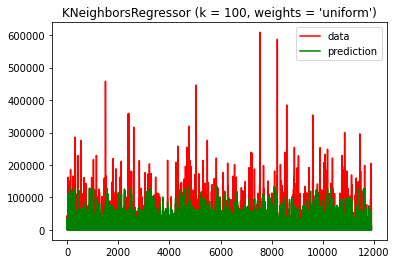

In [52]:
# Prediction graph
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

### 1.2.2 Taking top 4 + *Initial cost* - predicting *Final cost*

Another possible test is to run the same model as in the previous case but only with the 4 best features, those that have the most influence on prediction.

In [53]:
# Train and test definition
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
0,1,0,634.00,5,10000
1,1,0,422.70,5,3000
2,0,0,761.97,5,50000
3,0,0,200.00,5,650
4,0,0,865.38,5,3250


Min Value uniform : 7830.587307934596 (13)
Min Value distance : 8199.893299012452 (13)


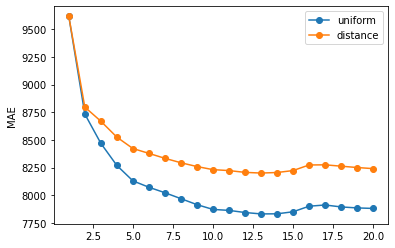

In [54]:
cv = KFold(n_splits = 10, shuffle = True, random_state=0) 
for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,100, 5):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       for train_fold, test_fold in cv.split(X_train):
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # Fit and predict
          knn.fit( X = fx_train, y = fy_train)
          y_pred = knn.predict(X = fx_test)

          # Evaluation
          mae = mean_absolute_error(fy_test, y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

At this time the chosen number of neighbours is 65.

In [55]:
n_neighbors = 13*5
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)

In [56]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 7383.814836424843
MAPE: 1.180015397346829
MSE: 503557935.9280506
R^2: 0.3042064457260528


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


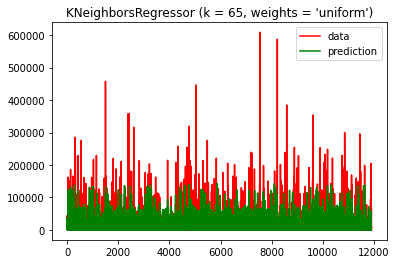

In [57]:
# Prediction graph
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

# 2. Optimized Model

In [58]:
#df_numeric['DifferenceCost'] = df_numeric['UltimateIncurredClaimCost'] - df_numeric['InitialIncurredCalimsCost']
#df_numeric['RatioCost'] = df_numeric['UltimateIncurredClaimCost'] / df_numeric['InitialIncurredCalimsCost']
#df_numeric.head()

## 2.1 RandomForest

In [59]:
# Train and test set definition
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']
#y = df_numeric['RatioCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
0,1,0,634.00,5,10000
1,1,0,422.70,5,3000
2,0,0,761.97,5,50000
3,0,0,200.00,5,650
4,0,0,865.38,5,3250


In [60]:
# Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 20, max_depth = 5, criterion='absolute_error', random_state=0)
# Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

In [61]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 5536.780955170514
MAPE: 0.4345970026745161
MSE: 527359025.29050416
R^2: 0.27131917818141094


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


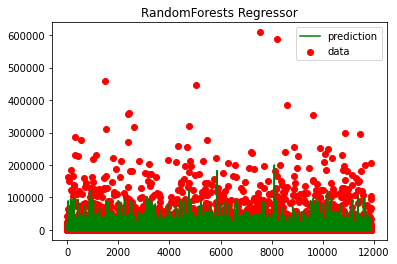

In [62]:
# Prediction graph
xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [63]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,MaritalStatus_S,0.000086
1,DependentChildren,0.004975
2,WeeklyWages,0.025199
3,DaysWorkedPerWeek,0.001032
4,InitialIncurredCalimsCost,0.968709


## 2.2 Boosting

In [64]:
# Train and test set definition
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost' ]

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42 )
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
0,1,0,634.00,5,10000
1,1,0,422.70,5,3000
2,0,0,761.97,5,50000
3,0,0,200.00,5,650
4,0,0,865.38,5,3250


In [65]:
# Fit regression model
regressors = []
regressors.append(DecisionTreeRegressor(max_depth=5, criterion='absolute_error', random_state=0))
regressors.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=5, criterion='absolute_error'),
                          n_estimators=30, random_state=42))
regressors.append(GradientBoostingRegressor(n_estimators=150, learning_rate=0.025,
                                   max_depth=5, random_state=0, loss='ls'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):
0it [00:00, ?it/s]

Error Measure 5571.315216974998


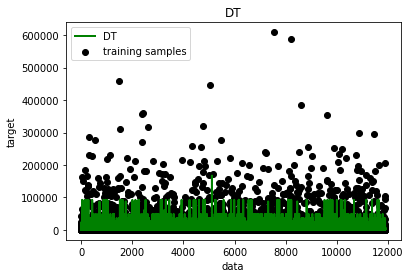

1it [00:09,  9.94s/it]

Error Measure 6728.476839722876


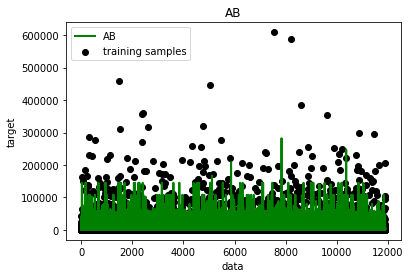

2it [03:38, 126.60s/it]/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Error Measure 7343.308541476521


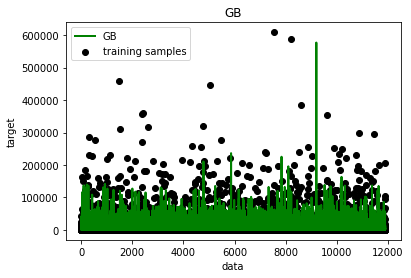

3it [03:41, 73.80s/it]


In [66]:
xx = np.stack(i for i in range(len(y_test)))
regr_names = ["DT", "AB", "GB"]
               
for i, r in tqdm(enumerate(regressors)):
    r.fit(X_train, y_train)
    y = r.predict(X_test)
    print ("Error Measure", mean_absolute_error(y_test,y))
    # Plot the results
    plt.figure()
    plt.scatter(xx, y_test, c="k", label="training samples")
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()


In [67]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree':regressors[0].feature_importances_, 
              'AdaBoostRegressor': regressors[1].feature_importances_,
              'GradientBoostingRegressor': regressors[2].feature_importances_, })

Feature Relevancies


,Attributes,Decision Tree,AdaBoostRegressor,GradientBoostingRegressor
0,MaritalStatus_S,0.000187,0.004590,0.008567
1,DependentChildren,0.004432,0.005909,0.013934
2,WeeklyWages,0.019525,0.472682,0.606793
3,DaysWorkedPerWeek,0.000000,0.004647,0.005120
4,InitialIncurredCalimsCost,0.975856,0.512172,0.365586


## 2.3 Hyperparameter Optimization

In [68]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

### 2.3.2 RandomForest

#### 2.3.2.1 Taking top 4 + *Initial cost* - predicting *Final cost*

In [69]:
# Train and test set definition
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
0,1,0,634.00,5,10000
1,1,0,422.70,5,3000
2,0,0,761.97,5,50000
3,0,0,200.00,5,650
4,0,0,865.38,5,3250


In [70]:
regressor = RandomForestRegressor(random_state=0)

In [71]:

param_dist = {"n_estimators": [8, 16, 24, 32], # Number of trees in random forest
              "max_depth": [6, 5, 4], # Maximum number of levels in tree
              #"bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["squared_error", "absolute_error"] #mse, mae
              }

In [72]:
rnd_regres = GridSearchCV(estimator = regressor, param_grid = param_dist, cv = 2, verbose=4)

# Fit the grid search model
rnd_regres.fit(X = X_train, y = y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=8;, score=-0.312 total time=   0.1s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=8;, score=0.109 total time=   0.1s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=16;, score=0.008 total time=   0.1s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=16;, score=0.114 total time=   0.1s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=24;, score=0.114 total time=   0.2s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=24;, score=0.117 total time=   0.2s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=32;, score=0.142 total time=   0.3s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=32;, score=0.117 total time=   0.3s
[CV 1/2] END criterion=squared_error, max_depth=5, n_estimators=8;, score=-0.119 total time=   0.1s
[CV 2/2] END criterion=squared_error, ma

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [6, 5, 4],
                         'n_estimators': [8, 16, 24, 32]},
             verbose=4)

In [73]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.178 (std: 0.074)
Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 32}

Model with rank: 2
Mean validation score: 0.178 (std: 0.074)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 32}

Model with rank: 3
Mean validation score: 0.178 (std: 0.073)
Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 24}

Model with rank: 4
Mean validation score: 0.178 (std: 0.074)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 8}

Model with rank: 5
Mean validation score: 0.178 (std: 0.074)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 24}



In [74]:
rnd_regres.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 32}

In [75]:
# choose the best
best_random = rnd_regres.best_estimator_

# fit and predict
best_random.fit( X = X_train, y =y_train)
y_pred = best_random.predict(X = X_test)

In [76]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 5536.471534681774
MAPE: 0.43449207293505154
MSE: 527211497.30829275
R^2: 0.2715230256670207


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


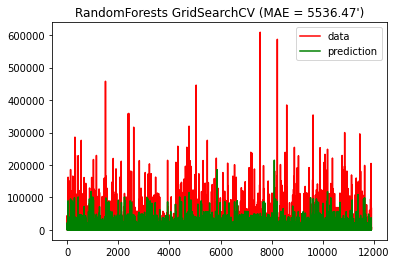

In [77]:
# Prediction graph
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( metrics.mean_absolute_error(y_pred , y_test)))

plt.show()

In [78]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,MaritalStatus_S,0.000191
1,DependentChildren,0.004835
2,WeeklyWages,0.025153
3,DaysWorkedPerWeek,0.000805
4,InitialIncurredCalimsCost,0.969017


#### 2.3.2.2 All features

In [79]:
# Train and test set definition
x_features = list(df_numeric.columns)
x_features.remove('UltimateIncurredClaimCost')

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,37,0,0,634.00,38.0,5,10000,0,1,0,0,1,0,1,0
1,26,0,0,422.70,24.2,5,3000,0,1,0,0,1,0,1,0
2,52,0,0,761.97,38.0,5,50000,0,1,0,1,0,0,1,0
3,33,0,0,200.00,38.0,5,650,1,0,0,1,0,0,1,0
4,42,0,0,865.38,38.0,5,3250,0,1,0,1,0,0,1,0


In [80]:
regressor = RandomForestRegressor( random_state=0)

In [81]:
param_dist = {"n_estimators": [8, 16, 24, 32], # Number of trees in random forest
              #"max_features": ['auto', 'sqrt', 'log2'], # Number of features to consider at every split
              "max_depth": [6, 5, 4], # Maximum number of levels in tree
              #"bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["squared_error", "absolute_error"] #mse, mae
              }

In [82]:
rnd_regres = GridSearchCV(estimator = regressor, param_grid=param_dist, cv = 2, verbose=4)

# Fit the grid search model
rnd_regres.fit(X = X_train, y = y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=8;, score=-1.740 total time=   0.1s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=8;, score=0.109 total time=   0.1s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=16;, score=-0.589 total time=   0.2s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=16;, score=0.114 total time=   0.2s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=24;, score=-0.649 total time=   0.3s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=24;, score=0.118 total time=   0.3s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=32;, score=-0.272 total time=   0.4s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=32;, score=0.118 total time=   0.5s
[CV 1/2] END criterion=squared_error, max_depth=5, n_estimators=8;, score=-2.588 total time=   0.1s
[CV 2/2] END criterion=squared_error,

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [6, 5, 4],
                         'n_estimators': [8, 16, 24, 32]},
             verbose=4)

In [83]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.181 (std: 0.077)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 24}

Model with rank: 2
Mean validation score: 0.181 (std: 0.077)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 8}

Model with rank: 3
Mean validation score: 0.180 (std: 0.076)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 32}

Model with rank: 4
Mean validation score: 0.180 (std: 0.076)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 16}

Model with rank: 5
Mean validation score: 0.179 (std: 0.075)
Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 24}



In [84]:
rnd_regres.best_params_

{'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 24}

In [85]:
# choose the best
best_random = rnd_regres.best_estimator_

# fit and predict
best_random.fit( X = X_train, y =y_train)
y_pred = best_random.predict(X = X_test)

In [86]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 5570.637976856183
MAPE: 0.44759886962224754
MSE: 528201530.05847913
R^2: 0.27015504324245565


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


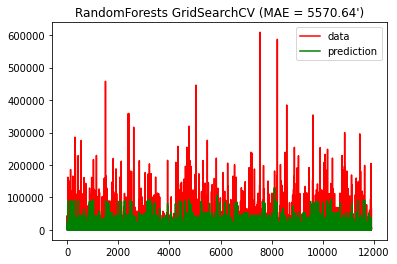

In [87]:
# Prediction graph
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( metrics.mean_absolute_error(y_pred , y_test)))

plt.show()

In [88]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,Age,0.000367
1,DependentChildren,0.003018
2,DependentsOther,0.000214
3,WeeklyWages,0.010913
4,HoursWorkedPerWeek,0.000179
5,DaysWorkedPerWeek,0.000000
6,InitialIncurredCalimsCost,0.985309
7,Gender_F,0.000000
8,Gender_M,0.000000
9,Gender_U,0.000000


###  2.3.2 Boosting (DT)

In [89]:
# Train and test set definition
x_features = ['MaritalStatus_S', 'DependentChildren', 'WeeklyWages', 'DaysWorkedPerWeek', 'InitialIncurredCalimsCost']

X = df_numeric[x_features]
y = df_numeric['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,MaritalStatus_S,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost
0,1,0,634.00,5,10000
1,1,0,422.70,5,3000
2,0,0,761.97,5,50000
3,0,0,200.00,5,650
4,0,0,865.38,5,3250


In [90]:
regressor = regressors[0]

In [91]:
# Apply to DT of Boosting
param_dist = {"max_features": ['auto', 'sqrt', 'log2', None], # Number of features to consider at every split
              "max_depth": [16, 12,8,6,5, None], # Maximum number of levels in tree
              #"bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["squared_error", "absolute_error"] #mse, mae
              }

In [92]:
rnd_regres = GridSearchCV(estimator = regressor, param_grid = param_dist, cv = 4, verbose=4)

# Fit the grid search model
rnd_regres.fit(X = X_train, y = y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[CV 1/4] END criterion=squared_error, max_depth=16, max_features=auto;, score=-0.076 total time=   0.1s
[CV 2/4] END criterion=squared_error, max_depth=16, max_features=auto;, score=-0.394 total time=   0.0s
[CV 3/4] END criterion=squared_error, max_depth=16, max_features=auto;, score=-0.070 total time=   0.0s
[CV 4/4] END criterion=squared_error, max_depth=16, max_features=auto;, score=-0.233 total time=   0.0s
[CV 1/4] END criterion=squared_error, max_depth=16, max_features=sqrt;, score=-0.017 total time=   0.0s
[CV 2/4] END criterion=squared_error, max_depth=16, max_features=sqrt;, score=-0.352 total time=   0.0s
[CV 3/4] END criterion=squared_error, max_depth=16, max_features=sqrt;, score=-0.055 total time=   0.0s
[CV 4/4] END criterion=squared_error, max_depth=16, max_features=sqrt;, score=-0.003 total time=   0.0s
[CV 1/4] END criterion=squared_error, max_depth=16, max_features=log2;, score=-0.017 total time=   0.0s
[C

GridSearchCV(cv=4,
             estimator=DecisionTreeRegressor(criterion='absolute_error',
                                             max_depth=5, random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [16, 12, 8, 6, 5, None],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=4)

In [93]:
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.206 (std: 0.086)
Parameters: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'auto'}

Model with rank: 1
Mean validation score: 0.206 (std: 0.086)
Parameters: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': None}

Model with rank: 3
Mean validation score: 0.201 (std: 0.080)
Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'auto'}

Model with rank: 3
Mean validation score: 0.201 (std: 0.080)
Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None}

Model with rank: 5
Mean validation score: 0.191 (std: 0.084)
Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'sqrt'}

Model with rank: 5
Mean validation score: 0.191 (std: 0.084)
Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'log2'}



In [94]:
rnd_regres.best_params_

{'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'auto'}

In [95]:
# choose the best
best_random = rnd_regres.best_estimator_

# fit and predict
best_random.fit( X = X_train, y =y_train)
y_pred = best_random.predict(X = X_test)

In [96]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 5595.59325392064
MAPE: 0.43076112309816694
MSE: 546471467.5222406
R^2: 0.24491047093550733


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


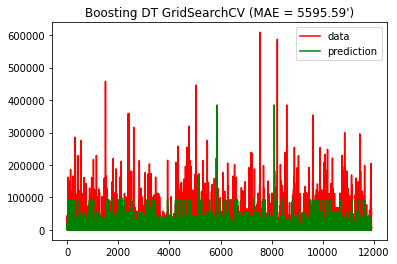

In [97]:
# Prediction graph
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Boosting DT GridSearchCV (MAE = %6.2f')" % ( metrics.mean_absolute_error(y_test, y_pred)))

plt.show()

In [98]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Random Forests': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forests
0,MaritalStatus_S,0.000636
1,DependentChildren,0.004363
2,WeeklyWages,0.026398
3,DaysWorkedPerWeek,0.001162
4,InitialIncurredCalimsCost,0.967441


# 3. Improvements (Include text data, other changes)

In [99]:
# Vectorizar la caraacteeristica de texto y luego mergear ambos dataframes


In [100]:
# Remove stopwords
stopwords = set(stopwords.words("english"))
# Not important words
stopwords.add('left')
stopwords.add('right')

df_full['words_tokenized'] = [word_tokenize(comment) for comment in df_full['ClaimDescription']]

df_full['words_tokenized'] = [[w for w in comment if w.lower() not in stopwords] for comment in df_full['words_tokenized']]
df_full['words_tokenized']

0              [LIFTING, TYRE, INJURY, ARM, WRIST, INJURY]
1        [STEPPED, AROUND, CRATES, TRUCK, TRAY, FRACTUR...
2                           [CUT, SHARP, EDGE, CUT, THUMB]
3              [DIGGING, LOWER, BACK, LOWER, BACK, STRAIN]
4        [REACHING, SHOULDER, LEVEL, ACUTE, MUSCLE, STR...
                               ...                        
36171                  [WALKED, DOOR, BRUISED, KNEE, PAIN]
36172             [LIFTING, HOT, WATER, TRAY, BURN, WRIST]
36173          [REMOVING, BROKEN, GLASS, LACERATED, THUMB]
36174                [FELL, SPRAINED, ANKLE, KNEE, INJURY]
36175             [LIFTING, METAL, CYLINDER, STRAIN, NECK]
Name: words_tokenized, Length: 36049, dtype: object

In [101]:
df_full['words_tokenized'] = [' '.join(comment) for comment in df_full['words_tokenized']]
df_full['words_tokenized']

0                     LIFTING TYRE INJURY ARM WRIST INJURY
1        STEPPED AROUND CRATES TRUCK TRAY FRACTURE FOREARM
2                                 CUT SHARP EDGE CUT THUMB
3                     DIGGING LOWER BACK LOWER BACK STRAIN
4        REACHING SHOULDER LEVEL ACUTE MUSCLE STRAIN SI...
                               ...                        
36171                        WALKED DOOR BRUISED KNEE PAIN
36172                    LIFTING HOT WATER TRAY BURN WRIST
36173                REMOVING BROKEN GLASS LACERATED THUMB
36174                      FELL SPRAINED ANKLE KNEE INJURY
36175                   LIFTING METAL CYLINDER STRAIN NECK
Name: words_tokenized, Length: 36049, dtype: object

In [102]:
vectorizer_ngrams = TfidfVectorizer(ngram_range=(1,3), max_features=15)

# Fit and transform
data_ngrams = vectorizer_ngrams.fit_transform(df_full['words_tokenized'])
print("vocabulary: ", vectorizer_ngrams.vocabulary_)


vocabulary:  {'lifting': 8, 'lower': 9, 'back': 0, 'strain': 13, 'lower back': 10, 'back strain': 1, 'shoulder': 11, 'struck': 14, 'finger': 4, 'hand': 5, 'slipped': 12, 'eye': 2, 'knee': 6, 'laceration': 7, 'fell': 3}


In [103]:
# Create a Dataframe
cv_tfidf_ngrams=pd.DataFrame(data_ngrams.toarray(),columns=vectorizer_ngrams.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
df_numeric.shape

(36049, 16)

In [105]:
df_numeric.reset_index(inplace=True, drop=True)

In [106]:
# Merge both dataframes
aux = df_numeric.join(cv_tfidf_ngrams)

In [107]:
dateAccident = list(map(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z"), df_full['DateTimeOfAccident']))
aux['MesAccidente'] = list(map(lambda x: x.month, dateAccident))
dateReport = list(map(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S%z"), df_full['DateReported']))
aux['MesReport'] = list(map(lambda x: x.month, dateReport))
aux['DiasTardaEnReportar'] = list(starmap(lambda x, y: (y - x).days, zip(dateAccident, dateReport)))
aux.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P,back,back strain,eye,fell,finger,hand,knee,laceration,lifting,lower,lower back,shoulder,slipped,strain,struck,MesAccidente,MesReport,DiasTardaEnReportar
0,48,0,0,500.00,38.0,5,1500,4748.203388,0,1,0,1,0,0,1,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,4,7,86
1,43,0,0,509.34,37.5,5,5500,6326.285819,1,0,0,1,0,0,1,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1,1,12
2,30,0,0,709.10,38.0,5,1700,2293.949087,0,1,0,0,0,1,1,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,3,4,20
3,41,0,0,555.46,38.0,5,15000,17786.487170,0,1,0,0,1,0,1,0,0.475235,0.314028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549849,0.560431,0.000000,0.0,0.243149,0.0,6,7,29
4,36,0,0,377.10,38.0,5,2800,4014.002925,0,1,0,1,0,0,1,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.788532,0.0,0.614994,0.0,8,9,28


In [108]:
# APLICAR MODELOOOOOOOOOS

In [109]:
# Train and test definition
x_features = list(aux.columns)
x_features.remove('UltimateIncurredClaimCost')

x_features.remove('DependentsOther')
x_features.remove('HoursWorkedPerWeek')
x_features.remove('Gender_F')
x_features.remove('Gender_M')
x_features.remove('Gender_U')
x_features.remove('MaritalStatus_M')
x_features.remove('MaritalStatus_U')
x_features.remove('PartTimeFullTime_P')
x_features.remove('PartTimeFullTime_F')
x_features.remove('Age')



X = aux[x_features]
y = aux['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,DependentChildren,WeeklyWages,DaysWorkedPerWeek,InitialIncurredCalimsCost,MaritalStatus_S,back,back strain,eye,fell,finger,hand,knee,laceration,lifting,lower,lower back,shoulder,slipped,strain,struck,MesAccidente,MesReport,DiasTardaEnReportar
0,0,634.00,5,10000,1,0.0,0.0,0.0,0.0,0.549864,0.568335,0.0,0.612083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,5
1,0,422.70,5,3000,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,8,19
2,0,761.97,5,50000,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,10
3,0,200.00,5,650,0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,12,27
4,0,865.38,5,3250,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10,10,12


In [110]:
# Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 16, max_depth = 5, criterion='absolute_error', random_state=0)
# Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

In [111]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 5459.799806351148
MAPE: 0.41318961789035646
MSE: 523412897.9662857
R^2: 0.27677175823354583


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


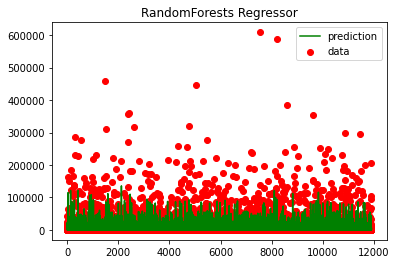

In [112]:
# Prediction graph
xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [113]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': x_features ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,DependentChildren,0.004320
1,WeeklyWages,0.017901
2,DaysWorkedPerWeek,0.000720
3,InitialIncurredCalimsCost,0.944342
4,MaritalStatus_S,0.000000
5,back,0.005096
6,back strain,0.000804
7,eye,0.000073
8,fell,0.002524
9,finger,0.000049
